### Import libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.spatial.distance as sdist
import sklearn.cluster as cluster

### Loading data

In [2]:
data  = pd.read_excel('../data/Week1_challenge_data_source.xlsx', na_values=['?', None])
data.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
# column names
list(data.columns)

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [4]:
# number of data points
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 150001 rows and 55 columns


### Handling Missing Values

In [5]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data)

The dataset contains 12.49 % missing values.


In [6]:
# Which column(s) has missing values
data.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
# fill missing with ffill method for columns (Bearer Id, MSISDN/Number, IMSI)
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]

def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

data['Bearer Id'] = fix_missing_ffill(data, 'Bearer Id')
data['MSISDN/Number'] = fix_missing_ffill(data, 'MSISDN/Number')
data['MSISDN/Number'] = fix_missing_ffill(data, 'IMSI')

In [8]:
# summary of a DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      150001 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [9]:
data.fillna(data.mean(), inplace = True) #  fill nann column with mode 

In [10]:
# summary of a DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150001 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150001 non-null  float64       
 5   Dur. (ms)                                 150001 non-null  float64       
 6   IMSI                                      150001 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      150001 non-null  float64       
 9   Last Location N

In [11]:
# change data type and formats
data['Bearer Id'] = data['Bearer Id'].astype('str')

data['MSISDN/Number'] = data['MSISDN/Number'].apply(lambda x: '{:.0f}'.format(x)).astype('str')

data['IMSI'] = data['IMSI'].apply(lambda x: '{:.0f}'.format(x)).astype('str')

data['IMEI'] = data['IMEI'].apply(lambda x: '{:.0f}'.format(x)).astype('str')

data['Start']=pd.to_datetime(data['Start'])
data['End']=pd.to_datetime(data['End'])

data['Handset Manufacturer'] = data['Handset Manufacturer'].astype('str')
data['Last Location Name'] = data['Last Location Name'].astype('str')

data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,208201448079117,208201448079117,35521209507511,9164566995485190,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,208201909211140,208201909211140,35794009006359,L77566A,65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,208200314458056,208200314458056,35281510359387,D42335A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,208201402342131,208201402342131,35356610164913,T21824A,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,3330.0,37882.0,1.321510e+09,undefined,undefined,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,208201401415120,208201401415120,35407009745539,D88865A,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.144710e+08,3.242301e+06,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Top 10 handsets used by the customers

In [12]:
top10_handsets_customers = data[['Handset Type','IMSI']].groupby(['Handset Type'])
#top10 = data.sort_values(['Handset Type','IMSI'], ascending=False).groupby('Handset Type')
top10_handsets_customers = top10_handsets_customers['IMSI'].nunique()
top10_handsets_customers = top10_handsets_customers.reset_index(name='Total')
top10_handsets_customers = top10_handsets_customers.sort_values(['Total'], ascending=False)
top10_handsets_customers.head(10)

,Handset Type,Total
316,Huawei B528S-23A,10638
53,Apple iPhone 6S (A1688),6765
1395,undefined,6716
49,Apple iPhone 6 (A1586),6271
59,Apple iPhone 7 (A1778),4721
73,Apple iPhone Se (A1723),3764
66,Apple iPhone 8 (A1905),3550
955,Samsung Galaxy S8 (Sm-G950F),3275
78,Apple iPhone Xr (A2105),3077
888,Samsung Galaxy J5 (Sm-J530),2760


### top 3 handset manufacturers

In [13]:
top3_handset_manufacturers = data[['Handset Manufacturer','IMSI']].groupby(['Handset Manufacturer'])
top3_handset_manufacturers = top3_handset_manufacturers['IMSI'].nunique().nlargest(3).reset_index()
top3_handset_manufacturers

,Handset Manufacturer,IMSI
0,Apple,42684
1,Samsung,30980
2,Huawei,21742


### top 5 handset manfacturer for Apple

In [14]:
Apple_handsets = data[data['Handset Manufacturer']=='Apple']
Apple_handsets = Apple_handsets.groupby(['Handset Type'])['IMSI']
Apple_handsets = Apple_handsets.nunique().nlargest(5).reset_index()
Apple_handsets

,Handset Type,IMSI
0,Apple iPhone 6S (A1688),6765
1,Apple iPhone 6 (A1586),6271
2,Apple iPhone 7 (A1778),4721
3,Apple iPhone Se (A1723),3764
4,Apple iPhone 8 (A1905),3550


### top 5 handset manfacturer for Huawei

In [15]:
Huawei_handsets = data[data['Handset Manufacturer']=='Huawei']
Huawei_handsets = Huawei_handsets.groupby(['Handset Type'])['IMSI']
Huawei_handsets = Huawei_handsets.nunique().nlargest(5).reset_index()
Huawei_handsets

,Handset Type,IMSI
0,Huawei B528S-23A,10638
1,Huawei P20 Lite Huawei Nova 3E,1534
2,Huawei E5180,1185
3,Huawei P20,1110
4,Huawei Y6 2018,757


### top 5 handset manfacturer for Samsung

In [16]:
Samsung_handset = data[data['Handset Manufacturer']=='Samsung']
Samsung_handset = Samsung_handset.groupby(['Handset Type'])['IMSI']
Samsung_handset = Samsung_handset.nunique().nlargest(5).reset_index()
Samsung_handset

,Handset Type,IMSI
0,Samsung Galaxy S8 (Sm-G950F),3275
1,Samsung Galaxy J5 (Sm-J530),2760
2,Samsung Galaxy A5 Sm-A520F,2721
3,Samsung Galaxy J3 (Sm-J330),2606
4,Samsung Galaxy S7 (Sm-G930X),2310


### number of xDR sessions

In [17]:
number_of_xDR_sessions = data.groupby('MSISDN/Number')
number_of_xDR_sessions.agg({"Bearer Id": "count"})

,Bearer Id
MSISDN/Number,
204047108489451,1
204080810288647,1
208200101016140,1
208200101127285,1
208200101148045,2
...,...
208209850788090,1
208209850788245,1
208209850788283,1


### Session duration

In [18]:
session_duration = data.groupby('MSISDN/Number')
session_duration.agg({"Dur. (ms)": "sum"})

,Dur. (ms)
MSISDN/Number,
204047108489451,869844.0
204080810288647,877385.0
208200101016140,86019.0
208200101127285,86254.0
208200101148045,573923.0
...,...
208209850788090,127367.0
208209850788245,168543.0
208209850788283,86399.0


### the total download (DL) and upload (UL) data

In [19]:
total_DL_UL = data.groupby(['MSISDN/Number'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
total_DL_UL.head(5)

,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,
204047108489451,60456049.0,78697597.0
204080810288647,37295915.0,194828056.0
208200101016140,53794658.0,31376981.0
208200101127285,33583272.0,392918313.0
208200101148045,71325004.0,961767023.0


##### upper and lower boundries

In [20]:
"""
calculate the boundaries outside which sit the outliers
for a Gaussian distribution
"""
def normal_boundaries(df, variable, distance):
    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()
    return upper_boundary, lower_boundary

In [21]:
# Upper and lower limits of duration
dur_upper_limit, dur_lower_limit = normal_boundaries(data, 'Dur. (ms)', 1.5)
dur_upper_limit, dur_lower_limit

(226164.58737635452, -16947.466683021194)

In [22]:
# Replacing the outliers by the maximum and minimum limit
data['Dur. (ms)']= np.where(data['Dur. (ms)'] > dur_upper_limit, dur_upper_limit,\
                       np.where(data['Dur. (ms)'] < dur_lower_limit, dur_lower_limit, data['Dur. (ms)']))

### Total data volume

In [24]:
x = data['Total_data'] = data['Total UL (Bytes)'] + data['Total DL (Bytes)']
x.describe()

count    1.500010e+05
mean     4.957646e+08
std      2.443810e+08
min      2.895611e+07
25%      2.844764e+08
50%      4.968610e+08
75%      7.065054e+08
max      9.559848e+08
dtype: float64

In [25]:
grouped_data= data.groupby('MSISDN/Number')
grouped_data.agg('Total_data').describe()

,count,mean,std,min,25%,50%,75%,max
MSISDN/Number,,,,,,,,
204047108489451,1.0,139153646.0,NaN,139153646.0,1.391536e+08,139153646.0,1.391536e+08,139153646.0
204080810288647,1.0,232123971.0,NaN,232123971.0,2.321240e+08,232123971.0,2.321240e+08,232123971.0
208200101016140,1.0,85171639.0,NaN,85171639.0,8.517164e+07,85171639.0,8.517164e+07,85171639.0
208200101127285,1.0,426501585.0,NaN,426501585.0,4.265016e+08,426501585.0,4.265016e+08,426501585.0
208200101148045,2.0,516546013.5,3.028714e+08,302383589.0,4.094648e+08,516546013.5,6.236272e+08,730708438.0
...,...,...,...,...,...,...,...,...
208209850788090,1.0,722703585.0,NaN,722703585.0,7.227036e+08,722703585.0,7.227036e+08,722703585.0
208209850788245,1.0,495865571.0,NaN,495865571.0,4.958656e+08,495865571.0,4.958656e+08,495865571.0
208209850788283,1.0,338180591.0,NaN,338180591.0,3.381806e+08,338180591.0,3.381806e+08,338180591.0


In [26]:
# total data
def total_data(df):
    cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
            'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
            'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
    df['Social Media'] = df[cols[0]] + df[cols[1]]
    df['Google'] = df[cols[2]] + df[cols[3]]
    df['Email'] = df[cols[4]] + df[cols[5]]
    df['Youtube'] = df[cols[6]] + df[cols[7]]
    df['Netflix'] = df[cols[8]] + df[cols[9]]
    df['Gaming'] = df[cols[10]] + df[cols[11]]
    df['Other'] = df[cols[12]] + df[cols[13]]
    df['Total'] = df[cols[14]] + df[cols[15]]
    return df
data = total_data(data)

### Total data volume (in Bytes) for Email

In [27]:
email_data = data['Email']
email_data

0         3.701304e+06
1         9.373850e+05
2         3.363124e+06
3         2.070983e+06
4         2.110349e+06
              ...     
149996    6.908760e+05
149997    2.121718e+06
149998    2.058277e+06
149999    2.850914e+06
150000    2.259102e+06
Name: Email, Length: 150001, dtype: float64

In [28]:
email_data.describe()

count    1.500010e+05
mean     2.259102e+06
std      1.071109e+06
min      8.359000e+03
25%      1.359344e+06
50%      2.263567e+06
75%      3.159818e+06
max      4.518036e+06
Name: Email, dtype: float64

<AxesSubplot:>

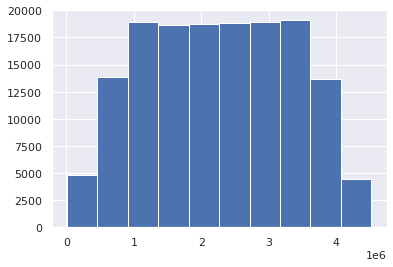

In [29]:
email_data.hist()

### Total data volume (in Bytes) for Socal media

In [30]:
social_data = data['Social Media']
social_data 

0         1.570185e+06
1         1.933278e+06
2         1.726277e+06
3         6.574930e+05
4         9.127880e+05
              ...     
149996    3.517065e+06
149997    2.352181e+06
149998    1.260239e+06
149999    8.231090e+05
150000    1.828250e+06
Name: Social Media, Length: 150001, dtype: float64

In [31]:
social_data.describe()

count    1.500010e+05
mean     1.828250e+06
std      1.035646e+06
min      1.563000e+03
25%      9.322180e+05
50%      1.826471e+06
75%      2.727487e+06
max      3.650861e+06
Name: Social Media, dtype: float64

<AxesSubplot:>

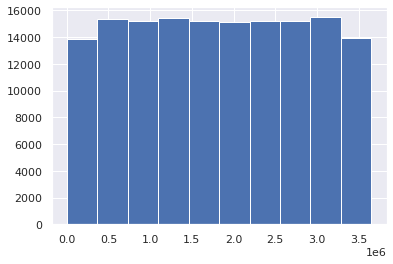

In [32]:
social_data.hist()

#### Total data volume (in Bytes) for Google

In [33]:
google_data = data['Google']
google_data 

0         2.905912e+06
1         4.414096e+06
2         1.022912e+07
3         1.181176e+07
4         7.748843e+06
              ...     
149996    1.278491e+07
149997    4.415361e+06
149998    6.585469e+06
149999    7.757267e+06
150000    7.807295e+06
Name: Google, Length: 150001, dtype: float64

In [34]:
google_data.describe()

count    1.500010e+05
mean     7.807295e+06
std      3.516420e+06
min      4.033000e+04
25%      4.943599e+06
50%      7.812835e+06
75%      1.068280e+07
max      1.552878e+07
Name: Google, dtype: float64

<AxesSubplot:>

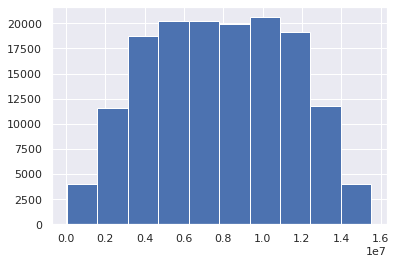

In [35]:
google_data.hist()

In [36]:
### Total data volume (in Bytes) for Youtube¶

In [37]:
youtube_data = data['Youtube']
youtube_data

0         1.835594e+07
1         3.935912e+07
2         3.442524e+07
3         3.653476e+07
4         3.422225e+07
              ...     
149996    2.795510e+07
149997    2.216552e+07
149998    2.451641e+07
149999    1.712251e+07
150000    2.264348e+07
Name: Youtube, Length: 150001, dtype: float64

In [38]:
youtube_data.describe()

count    1.500010e+05
mean     2.264348e+07
std      9.246800e+06
min      7.890300e+04
25%      1.599846e+07
50%      2.266177e+07
75%      2.929260e+07
max      4.519008e+07
Name: Youtube, dtype: float64

In [39]:
youtube_data.describe()

count    1.500010e+05
mean     2.264348e+07
std      9.246800e+06
min      7.890300e+04
25%      1.599846e+07
50%      2.266177e+07
75%      2.929260e+07
max      4.519008e+07
Name: Youtube, dtype: float64

<AxesSubplot:>

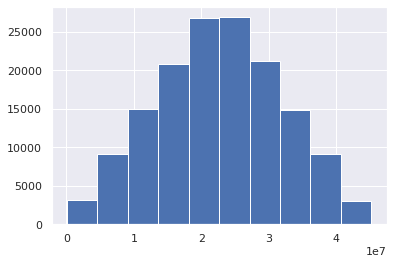

In [40]:
youtube_data.hist()

### Total data volume (in Bytes) for Netflix¶

In [41]:
netflix_data = data['Netflix']
netflix_data

0         1.785519e+07
1         3.556554e+07
2         2.375120e+07
3         1.509259e+07
4         1.753980e+07
              ...     
149996    3.756186e+07
149997    4.064329e+07
149998    1.502970e+07
149999    1.649484e+07
150000    2.262861e+07
Name: Netflix, Length: 150001, dtype: float64

In [42]:
netflix_data.describe()

count    1.500010e+05
mean     2.262861e+07
std      9.260820e+06
min      9.843200e+04
25%      1.597946e+07
50%      2.263554e+07
75%      2.929044e+07
max      4.519815e+07
Name: Netflix, dtype: float64

In [43]:
netflix_data.describe()

count    1.500010e+05
mean     2.262861e+07
std      9.260820e+06
min      9.843200e+04
25%      1.597946e+07
50%      2.263554e+07
75%      2.929044e+07
max      4.519815e+07
Name: Netflix, dtype: float64

### Total data volume (in Bytes) for Gaming¶

In [44]:
gaming_data = data['Gaming']
gaming_data

0         2.924265e+08
1         6.099208e+08
2         2.299803e+08
3         8.103879e+08
4         5.312370e+08
              ...     
149996    5.358069e+08
149997    6.316281e+08
149998    5.669338e+08
149999    3.550664e+08
150000    4.303331e+08
Name: Gaming, Length: 150001, dtype: float64

In [45]:
gaming_data.describe()

count    1.500010e+05
mean     4.303331e+08
std      2.440199e+08
min      3.063580e+05
25%      2.187279e+08
50%      4.316150e+08
75%      6.414159e+08
max      8.592028e+08
Name: Gaming, dtype: float64

<AxesSubplot:>

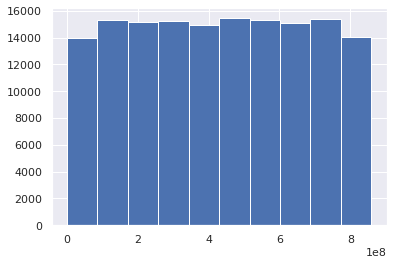

In [46]:
gaming_data.hist()

## Task 2: User Engagement analysis

### Top 10 customers per engagement metric

In [47]:
# top 10 sessions frequency
sessions_frequency = data.groupby('MSISDN/Number')
sessions_frequency = sessions_frequency.agg({"Bearer Id": "count"})
Top10_sessions_frequency = sessions_frequency.sort_values(by='Bearer Id', ascending=False)
Top10_sessions_frequency.head(10)

,Bearer Id
MSISDN/Number,
208201402778052,18
208201007176097,17
208201715944176,17
208201906760163,16
208202100881019,15
208201009693091,15
208200853859127,13
208201907697231,12
208201907543212,12


In [48]:
# duration of the session
session_duration= data.groupby('MSISDN/Number')
session_duration = session_duration.agg({"Dur. (ms)": "sum"})
Top10_session_duration = session_duration.sort_values(by='Dur. (ms)', ascending=False)
session_duration.head(10)

,Dur. (ms)
MSISDN/Number,
204047108489451,226164.587376
204080810288647,226164.587376
208200101016140,86019.000000
208200101127285,86254.000000
208200101148045,409450.587376
208200101148074,41246.000000
208200101148075,355378.587376
208200101148136,232058.000000
208200101148139,86399.000000


In [49]:
#the sessions total traffic (download and upload (bytes))
total_traffic = data.groupby('MSISDN/Number')
total_traffic = total_traffic.agg({"Total": "sum"})
Top10_total_traffic = total_traffic.sort_values(by='Total', ascending=False)
Top10_total_traffic.head(10)

,Total
MSISDN/Number,
208201715944176,8.846226e+09
208202100881019,8.514774e+09
208201007176097,8.499621e+09
208201402778052,7.971167e+09
208201009693091,7.891111e+09
208201906760163,7.705863e+09
208201402604136,7.308501e+09
208200313716101,7.132371e+09
208201714300272,6.872018e+09


In [50]:
# join customers per engagement metric
joined_data =pd.DataFrame(sessions_frequency.join(session_duration, how='left')).join(total_traffic, how='left')
joined_data

,Bearer Id,Dur. (ms),Total
MSISDN/Number,,,
204047108489451,1,226164.587376,1.391536e+08
204080810288647,1,226164.587376,2.321240e+08
208200101016140,1,86019.000000,8.517164e+07
208200101127285,1,86254.000000,4.265016e+08
208200101148045,2,409450.587376,1.033092e+09
...,...,...,...
208209850788090,1,127367.000000,7.227036e+08
208209850788245,1,168543.000000,4.958656e+08
208209850788283,1,86399.000000,3.381806e+08


In [51]:
joined_data.describe() #describe the joined customers per engagement metric

,Bearer Id,Dur. (ms),Total
count,107265.000000,1.072650e+05,1.072650e+05
mean,1.398415,1.378333e+05,6.932848e+08
std,0.810652,1.264075e+05,4.931038e+08
min,1.000000,7.142000e+03,3.324901e+07
25%,1.000000,7.084700e+04,3.593473e+08
50%,1.000000,1.026620e+05,6.193001e+08
75%,2.000000,1.727990e+05,8.592127e+08
max,18.000000,3.835301e+06,8.846226e+09


### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

In [52]:
k = 3
cols_to_standardize = ['Bearer Id',  'Dur. (ms)', 'Total']
data_to_standardize = joined_data[cols_to_standardize]

# Create the scaler.
scaler = StandardScaler().fit(data_to_standardize)

# Standardize the data
standardized_data = joined_data.copy()
standardized_columns = scaler.transform(data_to_standardize)
standardized_data[cols_to_standardize] = standardized_columns

print('Sample of data to use:')
print(standardized_data.sample(5), '\n')

model = KMeans(n_clusters = k).fit(standardized_data)

joined_data['cluster'] = model.predict(standardized_data)

print('Cluster summary:')
summary = joined_data.groupby(['cluster']).mean()
summary['count'] = joined_data['cluster'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
print(summary)

Sample of data to use:
                 Bearer Id  Dur. (ms)     Total
MSISDN/Number                                  
208201546534261  -0.491477  -1.028600 -0.334490
208201546625111  -0.491477  -0.484319  0.165636
208201909789125   3.209263   1.643610  3.351552
208200311498139  -0.491477   0.630644 -0.891524
208201908770027  -0.491477  -0.792332  0.072630 

Cluster summary:
         Bearer Id      Dur. (ms)         Total  count
cluster                                               
0         1.029881   99072.329605  4.968870e+08  80151
2         2.175214  203972.831441  1.109868e+09  23126
1         4.300652  533315.360540  2.224773e+09   3988


### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [53]:
# total traffic per application for email
group_data = data.groupby('MSISDN/Number')
email_traffic = group_data.agg({"Email": "sum"})
Top10_email_traffic = email_traffic.sort_values(by='Email', ascending=False)
Top10_email_traffic.head(10)

,Email
MSISDN/Number,
208201402778052,42418782.0
208201715944176,40788634.0
208201007176097,40633966.0
208201716367238,36310123.0
208201906760163,35999792.0
208202100881019,33693767.0
208201009693091,31514421.0
208201007286206,30417885.0
208200853859127,30335796.0


In [54]:
# total traffic per application for google
group_data = data.groupby('MSISDN/Number')
google_traffic = group_data.agg({'Google': "sum"})
Top10_google_traffic = google_traffic.sort_values(by='Google', ascending=False)
Top10_google_traffic.head(10)

,Google
MSISDN/Number,
208201402778052,152191852.0
208201007176097,142307915.0
208201715944176,127973787.0
208202100881019,123223099.0
208201906760163,116516345.0
208201716367238,110254484.0
208201009693091,109860502.0
208200853859127,105032696.0
208202101287048,97089988.0


In [55]:
# total traffic per application for social media
group_data = data.groupby('MSISDN/Number')
social_traffic = group_data.agg({'Social Media': "sum"})
Top10_social_traffic = social_traffic.sort_values(by='Social Media', ascending=False)
Top10_social_traffic.head(10)

,Social Media
MSISDN/Number,
208201402778052,43374779.0
208202100881019,39783189.0
208201906760163,35412358.0
208201715944176,28294544.0
208201007176097,27135500.0
208200853859127,24247850.0
208201716367238,23974919.0
208201771676245,23800834.0
208201907543212,23077825.0


In [56]:
# total traffic per application for youtube
group_data = data.groupby('MSISDN/Number')
youtube_traffic = group_data.agg({'Youtube': "sum"})
Top10_youtube_traffic = youtube_traffic.sort_values(by='Youtube', ascending=False)
Top10_youtube_traffic.head(10)

,Youtube
MSISDN/Number,
208201007176097,452958769.0
208202100881019,396289198.0
208201715944176,394370218.0
208201402778052,374483047.0
208201009693091,317410572.0
208200853859127,315231310.0
208201771999179,308790774.0
208200313716101,303169107.0
208201545274157,302661958.0


In [57]:
# total traffic per application for netflix
group_data = data.groupby('MSISDN/Number')
netflix_traffic = group_data.agg({'Netflix': "sum"})
Top10_netflix_traffic = netflix_traffic.sort_values(by='Netflix', ascending=False)
Top10_netflix_traffic.head(10)

,Netflix
MSISDN/Number,
208201906760163,399519079.0
208201715944176,361401046.0
208201007176097,356980607.0
208202100881019,334643269.0
208201402778052,328725740.0
208200313716101,318347546.0
208200853859127,313939488.0
208201009693091,309093159.0
208201716367238,305939790.0


In [58]:
# total traffic per application for gaming
group_data = data.groupby('MSISDN/Number')
gaming_traffic = group_data.agg({'Gaming': "sum"})
Top10_gaming_traffic = gaming_traffic.sort_values(by='Gaming', ascending=False)
Top10_gaming_traffic.head(10)

,Gaming
MSISDN/Number,
208201715944176,7.749432e+09
208202100881019,7.461045e+09
208201007176097,7.326673e+09
208201009693091,6.970568e+09
208201402778052,6.887572e+09
208201906760163,6.725559e+09
208201402604136,6.646303e+09
208200313716101,6.268620e+09
208201714300272,6.103856e+09


In [59]:
# total traffic per application for other
group_data = data.groupby('MSISDN/Number')
other_traffic = group_data.agg({'Other': "sum"})
Top10_other_traffic = other_traffic.sort_values(by='Other', ascending=False)
Top10_other_traffic.head(10)

,Other
MSISDN/Number,
208201402778052,8.167878e+09
208201715944176,7.639264e+09
208201009693091,6.798515e+09
208201007176097,6.354583e+09
208201907543212,6.326671e+09
208201906760163,6.317415e+09
208201544311292,5.305448e+09
208201771999179,5.117791e+09
208202101287048,5.077779e+09


### Top 3 most used application

In [60]:
all_application = data[[ 'Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']].sum()

In [61]:
all_ap = dict(all_application)
all_sum = dict(sorted(all_ap.items(), key=lambda item: item[1], reverse=True))
top3, i = {}, 0
for k, v in all_sum.items():
    if i == 3: break
    i+=1
    top3[k] = v
top3

{'Gaming': 64550395439016.7,
 'Other': 64405230908181.62,
 'Youtube': 3396545039272.6387}

In [62]:
#Get the Keys and store them in a list
labels = list(top3.keys())

# Get the Values and store them in a list
values = list(top3.values())

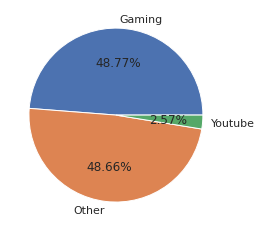

In [63]:
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.show()

### Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:

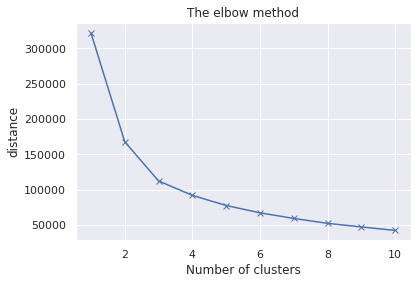

In [65]:
distance = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans.fit(standardized_data)
    distance.append(kmeans.inertia_)
plt.plot(range(1,11), distance, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('distance')
plt.show()

> from the figure we can see that 3 is the optimal number of clusters

## Task 3 - Experience Analytics

### Average TCP retransmission

In [109]:
data['Avg_TCP_retransmission'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP DL Retrans. Vol (Bytes)']
average_tcp =  data['Avg_TCP_retransmission']
average_tcp.fillna(data['Avg_TCP_retransmission'] .mean())

0         4.161983e+07
1         4.161983e+07
2         4.161983e+07
3         4.161983e+07
4         4.161983e+07
              ...     
149996    4.161983e+07
149997    4.161983e+07
149998    4.161983e+07
149999    4.161983e+07
150000    4.161983e+07
Name: Avg_TCP_retransmission, Length: 150001, dtype: float64

In [67]:
average_tcp

0         4.161983e+07
1         4.161983e+07
2         4.161983e+07
3         4.161983e+07
4         4.161983e+07
              ...     
149996    4.161983e+07
149997    4.161983e+07
149998    4.161983e+07
149999    4.161983e+07
150000    4.161983e+07
Name: Avg_TCP_retransmission, Length: 150001, dtype: float64

In [68]:
# Upper and lower limits of duration
dur_upper_limit, dur_lower_limit = normal_boundaries(data, 'Avg_TCP_retransmission', 1.5)
dur_upper_limit, dur_lower_limit

(393326556.59990096, -310086899.51847935)

In [69]:
# Replacing the outliers by the maximum and minimum limit
data['Avg_TCP_retransmission'] = np.where(data['Avg_TCP_retransmission'] > dur_upper_limit, dur_upper_limit,\
np.where(data['Avg_TCP_retransmission'] < dur_lower_limit, dur_lower_limit, data['Avg_TCP_retransmission']))

In [105]:
#top tcp
tcp_data= data.groupby('MSISDN/Number')
tcp_agg = grouped_data.agg({"Avg_TCP_retransmission": "sum"})
top_tcp = tcp_agg.sort_values(by='Avg_TCP_retransmission', ascending=False)
print('Top head\n---------------------')
print(top_tcp.head(10))
print('\nTop tail\n-------------------')
print(top_tcp.tail(10))

Top head
---------------------
                 Avg_TCP_retransmission
MSISDN/Number                          
208201771695057            2.143050e+09
208200854478323            1.964715e+09
208200854006027            1.813325e+09
208201715922217            1.573306e+09
208201401280154            1.573306e+09
208200854009145            1.515077e+09
208201771747320            1.511574e+09
208201716762091            1.491457e+09
208200853989011            1.471239e+09
208201401263249            1.438673e+09

Top tail
-------------------
                 Avg_TCP_retransmission
MSISDN/Number                          
208209502746805                     8.0
208209502715302                     8.0
208209502781756                     8.0
208209502721290                     8.0
208209502735852                     8.0
208209502734716                     8.0
208209502746704                     8.0
208209502560793                     8.0
208209502714967                     4.0
208209502735782    

### Average RTT

In [83]:
data['Avg_RTT'] = data['Avg RTT DL (ms)'] + data['Avg RTT DL (ms)']
rtt_average = data['Avg_RTT']
rtt_average.fillna(rtt_average.mean())

0          84.000000
1         130.000000
2         219.591412
3         219.591412
4         219.591412
             ...    
149996     64.000000
149997     54.000000
149998     86.000000
149999     74.000000
150000    219.591412
Name: Avg_RTT, Length: 150001, dtype: float64

In [84]:
# Upper and lower limits of duration
dur_upper_limit, dur_lower_limit = normal_boundaries(data, 'Avg_RTT', 1.5)
dur_upper_limit, dur_lower_limit

(1897.6192711737383, -1458.4364469583927)

In [85]:
# Replacing the outliers by the maximum and minimum limit
data['Avg_RTT']= np.where(data['Avg_RTT'] > dur_upper_limit, dur_upper_limit,
                       np.where(data['Avg_RTT'] < dur_lower_limit, dur_lower_limit, data['Avg_RTT']))

In [104]:
#top rtt
rtt_data= data.groupby('MSISDN/Number')
rtt_agg = rtt_data.agg({"Avg_RTT": "sum"})
top_rtt = rtt_agg.sort_values(by='Avg_RTT', ascending=False)
print('Top head\n---------------------')
print(top_rtt.head(10))
print('\nTop tail\n-------------------')
print(top_rtt.tail(10))

Top head
---------------------
                     Avg_RTT
MSISDN/Number               
208201771744007  7590.477085
208201715922087  6544.000000
208201009887260  6383.619271
208201401264083  5692.857814
208201771753065  5375.238542
208201449254204  5153.591412
208201771672150  5049.210683
208201715263192  5043.619271
208200314333056  5019.238542
208201711961007  4945.238542

Top tail
-------------------
                 Avg_RTT
MSISDN/Number           
208201402315172     10.0
208201005582047     10.0
208201402772063      8.0
208201716370267      4.0
208201716612122      0.0
208201006433074      0.0
208201910122135      0.0
208201716398289      0.0
208201005225051      0.0
208200314251127      0.0


### Handset type

In [ ]:
da['Handset Type'].fillna(da['Handset Type'].mode())

In [89]:
#top handset
handset_data = data.groupby('MSISDN/Number')
total_handset = handset_data.agg({"Handset Type": "value_counts"})
total = total_handset['Handset Type'].value_counts().head(10)
total

1     78094
2     21489
3      4425
4      1956
5       939
6       210
7        76
8        34
9        17
10       12
Name: Handset Type, dtype: int64

### Average throughput

In [114]:
data['Avg_Throughput'] = data['Avg Bearer TP DL (kbps)'] + data['Avg Bearer TP UL (kbps)']

In [115]:
avg_throughput = data['Avg_Throughput']
avg_throughput.fillna(avg_throughput.mean())

0            67.000000
1            42.000000
2            15.000000
3            88.000000
4            15.000000
              ...     
149996      117.000000
149997       77.000000
149998       90.000000
149999       71.000000
150000    15070.474573
Name: Avg_Throughput, Length: 150001, dtype: float64

In [ ]:
# Upper and lower limits of duration
dur_upper_limit, dur_lower_limit = normal_boundaries(data, 'Avg_Throughput', 1.5)
dur_upper_limit, dur_lower_limit

In [92]:
# Replacing the outliers by the maximum and minimum limit
data['Avg_Throughput']= np.where(data['Avg_Throughput'] > dur_upper_limit, dur_upper_limit,
np.where(data['Avg_Throughput'] < dur_lower_limit, dur_lower_limit, data['Avg_Throughput']))

In [103]:
#top throughput
throughput_data = data.groupby('MSISDN/Number')
total_hroughput = throughput_data.agg({"Avg_Throughput": "sum"})
top_throughput = total_hroughput.sort_values(by='Avg_Throughput', ascending=False)
print('Top head\n---------------------')
print(top_throughput.head(10))
print('\nTop tail\n-------------------')
print(top_throughput.tail(10))

Top head
---------------------
                 Avg_Throughput
MSISDN/Number                  
208201007176097    23351.573441
208201906760163    22384.811983
208201715944176    21523.811983
208200853859127    21291.334898
208201402778052    19636.192712
208201402547080    19099.192712
208201714300272    19048.192712
208201449213297    18976.192712
208201907543212    18662.573441
208201009693091    17596.573441

Top tail
-------------------
                 Avg_Throughput
MSISDN/Number                  
208201771671515             0.0
208201545470044             0.0
208201771653828             0.0
208201771650330             0.0
208201009276199             0.0
208201545546340             0.0
208201545786075             0.0
208201545836100             0.0
208201545926952             0.0
208201716599824             0.0


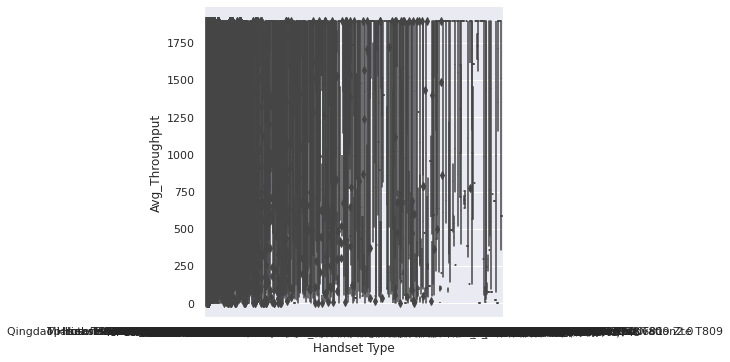

In [106]:
sns.catplot(x="Handset Type", y="Avg_Throughput", kind="box", data=data)

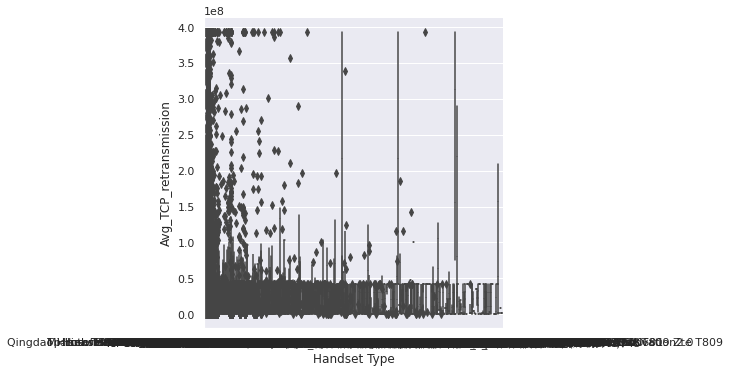

In [107]:
sns.catplot(x="Handset Type", y="Avg_TCP_retransmission", kind="box", data=data)

### Segmenting users into groups of experiences

In [131]:
joineddata =pd.DataFrame(average_tcp).join(avg_throughput, how='left')
print(joineddata)

        Avg_TCP_retransmission  Avg_Throughput
0                 4.161983e+07       67.000000
1                 4.161983e+07       42.000000
2                 4.161983e+07       15.000000
3                 4.161983e+07       88.000000
4                 4.161983e+07       15.000000
...                        ...             ...
149996            4.161983e+07      117.000000
149997            4.161983e+07       77.000000
149998            4.161983e+07       90.000000
149999            4.161983e+07       71.000000
150000            4.161983e+07    15070.474573

[150001 rows x 2 columns]


In [132]:
k = 3
cols_to_standardize = ['Avg_TCP_retransmission',  'Avg_Throughput']
data_to_standardize = joineddata[cols_to_standardize]

# Create the scaler.
scaler = StandardScaler().fit(data_to_standardize)

# Standardize the data
standardized_data = joineddata.copy()
standardized_columns = scaler.transform(data_to_standardize)
standardized_data[cols_to_standardize] = standardized_columns

print('Sample of data to use:')
print(standardized_data.sample(5))
print('')

model = KMeans(n_clusters=k).fit(standardized_data)

joineddata['cluster'] = model.predict(standardized_data)

print('Cluster summary:')
summary = joineddata.groupby(['cluster']).mean()
summary['count'] = joineddata['cluster'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
print(summary)

Sample of data to use:
        Avg_TCP_retransmission  Avg_Throughput
65253             3.177621e-17       -0.558364
103567           -1.774986e-01       -0.295518
44226            -1.768785e-01        0.195355
59364             3.177621e-17       -0.557991
120164           -1.754990e-01        1.749613

Cluster summary:
         Avg_TCP_retransmission  Avg_Throughput   count
cluster                                                
0                  3.283332e+07     4250.477958  122064
2                  3.441512e+07    62269.591154   27695
1                  5.298027e+09    71072.677686     242


## Task 4 - Satisfaction Analysis

### Engagement score to each user

In [137]:
points = joined_data.drop('Bearer Id', axis=1)
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(points)
joined_data['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
dists = pd.DataFrame(
    sdist.cdist(points, centroids), 
    columns=['dist_{}'.format(i) for i in range(len(centroids))],
    index=joined_data.index)
es = pd.concat([joined_data, dists], axis=1)
print(es)

                 Bearer Id      Dur. (ms)         Total  cluster  \
MSISDN/Number                                                      
204047108489451          1  226164.587376  1.391536e+08        2   
204080810288647          1  226164.587376  2.321240e+08        2   
208200101016140          1   86019.000000  8.517164e+07        2   
208200101127285          1   86254.000000  4.265016e+08        2   
208200101148045          2  409450.587376  1.033092e+09        0   
...                    ...            ...           ...      ...   
208209850788090          1  127367.000000  7.227036e+08        0   
208209850788245          1  168543.000000  4.958656e+08        2   
208209850788283          1   86399.000000  3.381806e+08        2   
208252167239575          1   56613.000000  8.457132e+08        0   
214074303349628          1  226164.587376  6.945057e+08        0   

                       dist_0        dist_1        dist_2  
MSISDN/Number                                          

In [134]:
df.describe()

,Bearer Id,Dur. (ms),Total,cluster,dist_0,dist_1,dist_2
count,107265.000000,1.072650e+05,1.072650e+05,107265.000000,1.072650e+05,1.072650e+05,1.072650e+05
mean,1.398415,1.378333e+05,6.932848e+08,1.013220,3.837200e+08,1.188116e+09,4.182846e+08
std,0.810652,1.264075e+05,4.931038e+08,0.953406,3.379120e+08,3.963859e+08,4.445280e+08
min,1.000000,7.142000e+03,3.324901e+07,0.000000,3.852182e+04,7.797210e+04,2.686455e+04
25%,1.000000,7.084700e+04,3.593473e+08,0.000000,1.361852e+08,9.902525e+08,1.379864e+08
50%,1.000000,1.026620e+05,6.193001e+08,1.000000,3.355814e+08,1.228704e+09,2.859616e+08
75%,2.000000,1.727990e+05,8.592127e+08,2.000000,5.595900e+08,1.487603e+09,5.256727e+08
max,18.000000,3.835301e+06,8.846226e+09,2.000000,8.017756e+09,7.001599e+09,8.512687e+09


### experience score to each user

### Top 10 satisfaid customer by average engagement score 

In [138]:
es['avg1'] = es[['dist_0','dist_1','dist_2']].mean(axis=1)
sort_by_avg1 = es.sort_values('avg1',ascending=False)
sort_by_avg1.head(10)

,Bearer Id,Dur. (ms),Total,cluster,dist_0,dist_1,dist_2,avg1
MSISDN/Number,,,,,,,,
208201715944176,17,3.635115e+06,8.846226e+09,1,8.017756e+09,7.001599e+09,8.512687e+09,7.844014e+09
208202100881019,15,3.188505e+06,8.514774e+09,1,7.686303e+09,6.670146e+09,8.181234e+09,7.512561e+09
208201007176097,17,3.835301e+06,8.499621e+09,1,7.671150e+09,6.654993e+09,8.166081e+09,7.497408e+09
208201402778052,18,3.742137e+06,7.971167e+09,1,7.142697e+09,6.126540e+09,7.637628e+09,6.968955e+09
208201009693091,15,3.142787e+06,7.891111e+09,1,7.062640e+09,6.046483e+09,7.557571e+09,6.888898e+09
208201906760163,16,3.294363e+06,7.705863e+09,1,6.877392e+09,5.861235e+09,7.372323e+09,6.703650e+09
208201402604136,11,2.413917e+06,7.308501e+09,1,6.480030e+09,5.463873e+09,6.974961e+09,6.306288e+09
208200313716101,12,2.506367e+06,7.132371e+09,1,6.303900e+09,5.287743e+09,6.798831e+09,6.130158e+09
208201714300272,11,2.438368e+06,6.872018e+09,1,6.043548e+09,5.027390e+09,6.538478e+09,5.869805e+09


### Top 10 satisfaid customer by average engagement score

In [139]:
es['avg1'] = es[['dist_0','dist_1','dist_2']].mean(axis=1)
sort_by_avg1 = es.sort_values('avg1',ascending=False)
sort_by_avg1.head(10)

,Bearer Id,Dur. (ms),Total,cluster,dist_0,dist_1,dist_2,avg1
MSISDN/Number,,,,,,,,
208201715944176,17,3.635115e+06,8.846226e+09,1,8.017756e+09,7.001599e+09,8.512687e+09,7.844014e+09
208202100881019,15,3.188505e+06,8.514774e+09,1,7.686303e+09,6.670146e+09,8.181234e+09,7.512561e+09
208201007176097,17,3.835301e+06,8.499621e+09,1,7.671150e+09,6.654993e+09,8.166081e+09,7.497408e+09
208201402778052,18,3.742137e+06,7.971167e+09,1,7.142697e+09,6.126540e+09,7.637628e+09,6.968955e+09
208201009693091,15,3.142787e+06,7.891111e+09,1,7.062640e+09,6.046483e+09,7.557571e+09,6.888898e+09
208201906760163,16,3.294363e+06,7.705863e+09,1,6.877392e+09,5.861235e+09,7.372323e+09,6.703650e+09
208201402604136,11,2.413917e+06,7.308501e+09,1,6.480030e+09,5.463873e+09,6.974961e+09,6.306288e+09
208200313716101,12,2.506367e+06,7.132371e+09,1,6.303900e+09,5.287743e+09,6.798831e+09,6.130158e+09
208201714300272,11,2.438368e+06,6.872018e+09,1,6.043548e+09,5.027390e+09,6.538478e+09,5.869805e+09
